# import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# import the dataset

In [2]:
df = pd.read_csv('WineQT.csv')

# check the shape of the dataset

In [3]:
# number of rows
print(f'Number of rows: {df.shape[0]}')

# number of columns
print(f'Number of columns: {df.shape[1]}')

Number of rows: 1143
Number of columns: 13


# check the dataset

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# check for null-nan values

In [6]:
df.isnull().mean() * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

# drop unuseful columns

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# Make Plots

<Axes: xlabel='quality', ylabel='alcohol'>

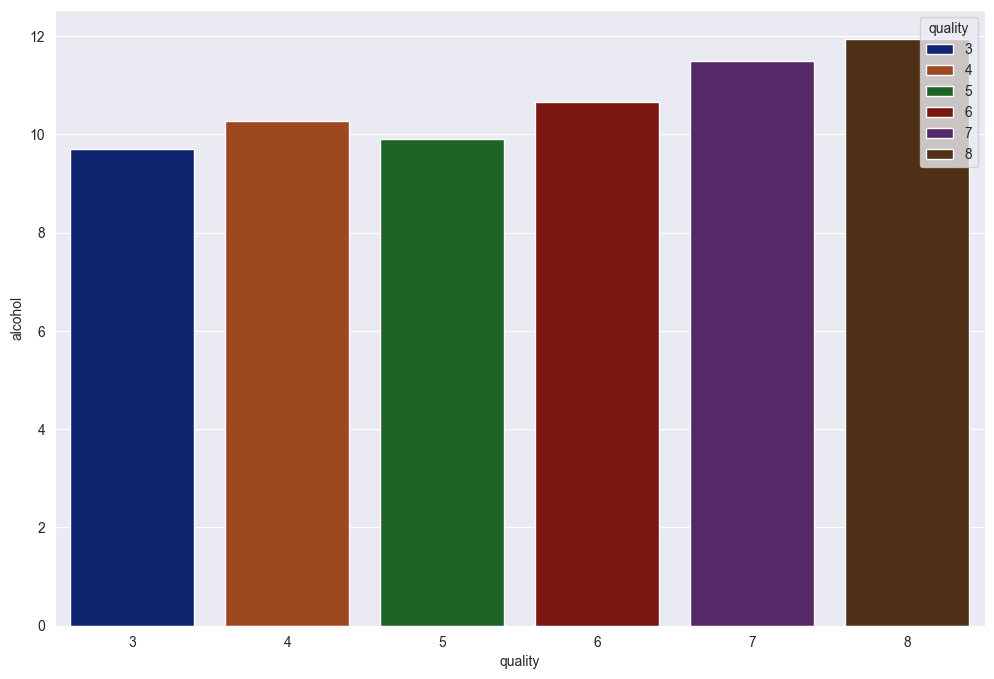

In [12]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df, x='quality', y='alcohol', hue='quality', palette='dark', errorbar=None)

# Split the Dataset

In [13]:
# import train split function
from sklearn.model_selection import train_test_split

# all columns except the target column
X = df.drop('quality', axis=1)

# target column
y = df['quality']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [15]:
# import linear regression model
from sklearn.linear_model import LinearRegression

# create an instance of linear regression
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression()

# model predictions

In [34]:
# random features to make predictions
random_samples = np.array([
    [random.choice(X[col]) for col in X.columns]
])

# predict
new_prediction = lr.predict(random_samples)

print(f'Prediction: {new_prediction[0]}')


Prediction: 6.140437729594478


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# errors

In [70]:
# take one random value from the X_test and from the target column
actual_value = random.choice(df['quality'])

# square error
error = (actual_value - new_prediction)
square_error = error * error

print(f'Square Error: {square_error}')

Square Error: [0.01972276]
